# Importing libraries

In [1]:
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [2]:
ps=PorterStemmer()

# Function for cleaning an given text
It removes characters other than a-z, Converts the string to lower case, Removes stop words and splits each word

In [3]:
def clean(text):
    text = re.sub('[^a-zA-Z]', " ", text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stopwords.words("english")]
    text = ' '.join(text)
    return text

# Read dataframe using pandas and giving the second row as column labels

In [4]:
df=pd.read_csv(r"C:\Users\91880\Downloads\browser_rankings_data.csv",header=1)

In [5]:
df

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,in,en,2021-03-06,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
3062,131576,android browser,5.0,in,en,2021-03-06,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3063,131576,android browser,5.0,in,en,2021-03-06,com.cloudmosa.puffinTV,2021-02-06,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3064,131576,android browser,5.0,in,en,2021-03-06,com.cloudmosa.puffinTV,2021-01-21,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


# Applying the clean function for short description and long description, For app id we remove all the special characters

In [6]:
df['Short Description']=df['Short Description'].apply(lambda x: clean(str(x)))
df['Long Description']=df['Long Description'].apply(lambda x: clean(str(x)))
df['App ID']=df['App ID'].apply(lambda x: re.sub('[^a-zA-Z]', " ", str(x)))

# Checking for null values

In [7]:
df.isna().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

# Less number of null values, so it can be dropped

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

ID                                 0
Keyword                            0
Rank                               0
Country                            0
Language                           0
Date                               0
App ID                             0
Date of Last Description Change    0
Short Description                  0
Long Description                   0
dtype: int64

# Country and Language is same for all so lets drop it

In [10]:
df.drop(['Country','Language'],axis=1,inplace=True)
df

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,2020-12-16,net fast web browser,2020-12-18,small fastest secur web browser best mobil bro...,one smallest fastest secur web browser specif ...
1,2,browser,3.0,2020-12-16,com android chrome,2020-12-18,fast simpl secur googl chrome browser android ...,googl chrome fast easi use secur web browser d...
2,3,browser,4.0,2020-12-16,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...
3,3,browser,4.0,2020-12-16,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...
4,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...
...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,2021-03-06,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...
3062,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...
3063,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-02-06,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...
3064,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-01-21,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...


# Lets groupy according to app_id and rank - to find any insights

In [11]:
gk = df.groupby(['App ID','Rank'])
gk.first()

ID          Keyword        Date  \
App ID               Rank                                        
com android chrome   1.0    13588          browser  2020-12-29   
                     2.0    12286          browser  2020-12-28   
                     3.0        2          browser  2020-12-16   
                     4.0       44          browser  2020-12-17   
                     5.0    26140          browser  2021-01-08   
...                           ...              ...         ...   
net fast web browser 13.0     228  android browser  2020-12-19   
                     14.0      45  android browser  2020-12-17   
                     15.0   16594          browser  2020-12-31   
                     16.0   19246  android browser  2021-01-02   
                     24.0  124901  android browser  2021-03-03   

                          Date of Last Description Change  \
App ID               Rank                                   
com android chrome   1.0                       2020-12-18   
                     2.0                       2020-12-18   
                     3.0                       2020-12-18   
                     4.0                       2020-12-18   
                     5.0                       2020-12-18   
...                                                   ...   
net fast web browser 13.0                      2020-12-18   
                     14.0                      2020-12-18   
                     15.0                      2020-12-18   
                     16.0                      2020-12-18   
                     24.0                      2020-12-18   

                                                           Short Description  \
App ID               Rank                                                      
com android chrome   1.0   fast simpl secur googl chrome browser android ...   
                     2.0   fast simpl secur googl chrome browser android ...   
                     3.0   fast simpl secur googl chrome browser android ...   
                     4.0   fast simpl secur googl chrome browser android ...   
                     5.0   fast simpl secur googl chrome browser android ...   
...                                                                      ...   
net fast web browser 13.0  small fastest secur web browser best mobil bro...   
                     14.0  small fastest secur web browser best mobil bro...   
                     15.0  small fastest secur web browser best mobil bro...   
                     16.0  small fastest secur web browser best mobil bro...   
                     24.0  small fastest secur web browser best mobil bro...   

                                                            Long Description  
App ID               Rank                                                     
com android chrome   1.0   googl chrome fast easi use secur web browser d...  
                     2.0   googl chrome fast easi use secur web browser d...  
                     3.0   googl chrome fast easi use secur web browser d...  
                     4.0   googl chrome fast easi use secur web browser d...  
                     5.0   googl chrome fast easi use secur web browser d...  
...                                                                      ...  
net fast web browser 13.0  one smallest fastest secur web browser specif ...  
                     14.0  one smallest fastest secur web browser specif ...  
                     15.0  one smallest fastest secur web browser specif ...  
                     16.0  one smallest fastest secur web browser specif ...  
                     24.0  one smallest fastest secur web browser specif ...  

[275 rows x 6 columns]

# As we can see for the same app_id the rank is changing, To further analyze lets groupby the date and rank

In [12]:
gk = df.groupby(['Date', 'Rank'])
gk.first()

ID                       Keyword  \
Date       Rank                                          
2020-12-16 1.0         4                       browser   
           2.0         1                       browser   
           3.0         2                       browser   
           4.0         3                       browser   
           8.0         6               android browser   
...                  ...                           ...   
2021-03-06 31.0   129885               ad free browser   
           38.0   129870  privacy browsers for android   
           44.0   129874         best privacy browsers   
           83.0   129878                  fast browser   
           106.0  129866               privacy browser   

                                  App ID Date of Last Description Change  \
Date       Rank                                                            
2020-12-16 1.0    com cloudmosa puffinTV                      2021-02-07   
           2.0      net fast web browser                      2020-12-18   
           3.0        com android chrome                      2020-12-18   
           4.0         com opera browser                      2021-02-27   
           8.0        com android chrome                      2020-12-18   
...                                  ...                             ...   
2021-03-06 31.0    com transsion phoenix                      2020-12-18   
           38.0      com vivaldi browser                      2020-12-18   
           44.0      com vivaldi browser                      2020-12-18   
           83.0      com vivaldi browser                      2020-12-18   
           106.0     com vivaldi browser                      2020-12-18   

                                                  Short Description  \
Date       Rank                                                       
2020-12-16 1.0            puffin tv browser one app watch video web   
           2.0    small fastest secur web browser best mobil bro...   
           3.0    fast simpl secur googl chrome browser android ...   
           4.0    fast safe web browser free vpn ad blocker qr c...   
           8.0    fast simpl secur googl chrome browser android ...   
...                                                             ...   
2021-03-06 31.0   funni video footbal amp celebr news fast amp d...   
           38.0   fast amp privat web browser ad blocker sync da...   
           44.0   fast amp privat web browser ad blocker sync da...   
           83.0   fast amp privat web browser ad blocker sync da...   
           106.0  fast amp privat web browser ad blocker sync da...   

                                                   Long Description  
Date       Rank                                                      
2020-12-16 1.0    puffin tv browser special edit puffin web brow...  
           2.0    one smallest fastest secur web browser specif ...  
           3.0    googl chrome fast easi use secur web browser d...  
           4.0    fast safe privat introduc latest version opera...  
           8.0    googl chrome fast easi use secur web browser d...  
...                                                             ...  
2021-03-06 31.0   phoenix browser fast safe web browser android ...  
           38.0   vivaldi new privat web browser integr ad block...  
           44.0   vivaldi new privat web browser integr ad block...  
           83.0   vivaldi new privat web browser integr ad block...  
           106.0  vivaldi new privat web browser integr ad block...  

[1352 rows x 6 columns]

# So from observing we can say that for a particular date the rank is varying according to the 'keyword' for the same app

# Code to find the place in which keyword occurs in short and long description

In [13]:
# Entering a column factor that tells how near the keyword is present in both short and long description
df['s_factor']=0
df['l_factor']=0

# Loop to iterate index values
for n in df.index:
    
    #Temporary variables that hold each words in the short description and keywords
    temp1 = re.findall(r'\w+', str(df['Short Description'][n])) 
    temp2 = re.findall(r'\w+', str(df['Keyword'][n])) 
    
    #Loop to find keyword in short description
    for i in temp2:
        
        #variable that returns the place
        count1=0
        
        for j in temp1:
            count1+=1
            if i==j:
                df['s_factor'][n]+=count1
                break
                
    #Temporary variables that hold each words in the long description and keywords
    temp1 = re.findall(r'\w+', str(df['Long Description'][n]))
    temp2 = re.findall(r'\w+', str(df['Keyword'][n]))
    
    #Loop to find keyword in long description
    for i in temp2:
        
        #variable that returns the place
        count2=0
        
        for j in temp1:
            count2+=1
            if i==j:
                df['l_factor'][n]+=count2
                break

C:\Users\91880\AppData\Local\Temp\ipykernel_14568\525230147.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s_factor'][n]+=count1
C:\Users\91880\AppData\Local\Temp\ipykernel_14568\525230147.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['l_factor'][n]+=count2


# Here, if the factor is less then it means the keyword is found at the very start of short and long description, If factor is zero then it means the keyword is not present in both short and long description

In [14]:
df['factor']=df['s_factor']+df['l_factor']
df

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description,s_factor,l_factor,factor
0,1,browser,2.0,2020-12-16,net fast web browser,2020-12-18,small fastest secur web browser best mobil bro...,one smallest fastest secur web browser specif ...,5,6,11
1,2,browser,3.0,2020-12-16,com android chrome,2020-12-18,fast simpl secur googl chrome browser android ...,googl chrome fast easi use secur web browser d...,6,8,14
2,3,browser,4.0,2020-12-16,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,9,13
3,3,browser,4.0,2020-12-16,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...,4,5,9
4,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,2021-03-06,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...,4,11,15
3062,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,13,16
3063,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-02-06,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,13,16
3064,131576,android browser,5.0,2021-03-06,com cloudmosa puffinTV,2021-01-21,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,13,16


# Groupby to compare the factor values

In [15]:
gk = df.groupby(['Date', 'Rank'])
gk.first()

ID                       Keyword  \
Date       Rank                                          
2020-12-16 1.0         4                       browser   
           2.0         1                       browser   
           3.0         2                       browser   
           4.0         3                       browser   
           8.0         6               android browser   
...                  ...                           ...   
2021-03-06 31.0   129885               ad free browser   
           38.0   129870  privacy browsers for android   
           44.0   129874         best privacy browsers   
           83.0   129878                  fast browser   
           106.0  129866               privacy browser   

                                  App ID Date of Last Description Change  \
Date       Rank                                                            
2020-12-16 1.0    com cloudmosa puffinTV                      2021-02-07   
           2.0      net fast web browser                      2020-12-18   
           3.0        com android chrome                      2020-12-18   
           4.0         com opera browser                      2021-02-27   
           8.0        com android chrome                      2020-12-18   
...                                  ...                             ...   
2021-03-06 31.0    com transsion phoenix                      2020-12-18   
           38.0      com vivaldi browser                      2020-12-18   
           44.0      com vivaldi browser                      2020-12-18   
           83.0      com vivaldi browser                      2020-12-18   
           106.0     com vivaldi browser                      2020-12-18   

                                                  Short Description  \
Date       Rank                                                       
2020-12-16 1.0            puffin tv browser one app watch video web   
           2.0    small fastest secur web browser best mobil bro...   
           3.0    fast simpl secur googl chrome browser android ...   
           4.0    fast safe web browser free vpn ad blocker qr c...   
           8.0    fast simpl secur googl chrome browser android ...   
...                                                             ...   
2021-03-06 31.0   funni video footbal amp celebr news fast amp d...   
           38.0   fast amp privat web browser ad blocker sync da...   
           44.0   fast amp privat web browser ad blocker sync da...   
           83.0   fast amp privat web browser ad blocker sync da...   
           106.0  fast amp privat web browser ad blocker sync da...   

                                                   Long Description  s_factor  \
Date       Rank                                                                 
2020-12-16 1.0    puffin tv browser special edit puffin web brow...         3   
           2.0    one smallest fastest secur web browser specif ...         5   
           3.0    googl chrome fast easi use secur web browser d...         6   
           4.0    fast safe privat introduc latest version opera...         4   
           8.0    googl chrome fast easi use secur web browser d...        13   
...                                                             ...       ...   
2021-03-06 31.0   phoenix browser fast safe web browser android ...        11   
           38.0   vivaldi new privat web browser integr ad block...         0   
           44.0   vivaldi new privat web browser integr ad block...         0   
           83.0   vivaldi new privat web browser integr ad block...         6   
           106.0  vivaldi new privat web browser integr ad block...         5   

                  l_factor  factor  
Date       Rank                     
2020-12-16 1.0           3       6  
           2.0           6      11  
           3.0           8      14  
           4.0           9      13  
           8.0          18      31  
...                    ...     ...  
2021

# So the placement of keyword in short and long description is important in ranking of the app

# Hence the short and long description is corelated with ranking through the keywords

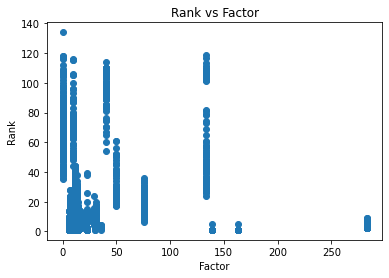

In [16]:
plt.scatter(df['factor'],df['Rank'])
plt.xlabel('Factor')
plt.ylabel('Rank')
plt.title('Rank vs Factor')
plt.show()

# Observation :
# Mostly if factor is low we can say that the rank will be low

# But we can  also see low ranks for high factor values and high ranks for low factor values, To find this we can sort by factor values

In [17]:
df.sort_values('factor')

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description,s_factor,l_factor,factor
779,22906,privacy browsers for android,94.0,2021-01-06,com vivaldi browser,2020-12-18,fast amp privat web browser ad blocker sync da...,vivaldi new privat web browser integr ad block...,0,0,0
491,14522,privacy browsers for android,59.0,2020-12-30,com vivaldi browser,2020-12-18,fast amp privat web browser ad blocker sync da...,vivaldi new privat web browser integr ad block...,0,0,0
496,14526,best privacy browsers,58.0,2020-12-30,com vivaldi browser,2020-12-18,fast amp privat web browser ad blocker sync da...,vivaldi new privat web browser integr ad block...,0,0,0
2586,105708,best privacy browsers,117.0,2021-02-23,com vivaldi browser,2020-12-18,fast amp privat web browser ad blocker sync da...,vivaldi new privat web browser integr ad block...,0,0,0
2581,105704,privacy browsers for android,60.0,2021-02-23,com vivaldi browser,2020-12-18,fast amp privat web browser ad blocker sync da...,vivaldi new privat web browser integr ad block...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
643,19245,android browser,5.0,2021-01-02,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,279,283
1259,39873,android browser,2.0,2021-01-17,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,279,283
369,11148,android browser,3.0,2020-12-27,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,279,283
2941,124904,android browser,8.0,2021-03-03,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,279,283


# When the keyword is more than one word(ex: android browser) then the factor calculated will be sum of placement of all words

# Hence even if factor is less it may not contain all the words from the keywords, which gives us the reason for the variation found in the graph

# Now lets findout whether app_id or any other values affect the ranking, Lets take keywords with one word(ex: browser) for more clarity

In [20]:
pd.set_option('display.max_rows',100)
df_new=df[df['Keyword']=='browser']
df_new

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description,s_factor,l_factor,factor
0,1,browser,2.0,2020-12-16,net fast web browser,2020-12-18,small fastest secur web browser best mobil bro...,one smallest fastest secur web browser specif ...,5,6,11
1,2,browser,3.0,2020-12-16,com android chrome,2020-12-18,fast simpl secur googl chrome browser android ...,googl chrome fast easi use secur web browser d...,6,8,14
2,3,browser,4.0,2020-12-16,com opera browser,2021-02-27,fast safe web browser free vpn ad blocker qr c...,fast safe privat introduc latest version opera...,4,9,13
3,3,browser,4.0,2020-12-16,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...,4,5,9
4,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...
3053,131571,browser,10.0,2021-03-06,com opera browser,2020-12-18,fast safe web browser free vpn ad blocker qr c...,opera fast safe web browser android devic feat...,4,5,9
3054,131572,browser,4.0,2021-03-06,com cloudmosa puffinTV,2021-02-07,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,3,6
3055,131572,browser,4.0,2021-03-06,com cloudmosa puffinTV,2021-02-06,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,3,6
3056,131572,browser,4.0,2021-03-06,com cloudmosa puffinTV,2021-01-21,puffin tv browser one app watch video web,puffin tv browser special edit puffin web brow...,3,3,6


# Using groupby

In [21]:
gk = df_new.groupby(['Date', 'Rank'])
gk.first()

ID  Keyword                  App ID  \
Date       Rank                                            
2020-12-16 1.0        4  browser  com cloudmosa puffinTV   
           2.0        1  browser    net fast web browser   
           3.0        2  browser      com android chrome   
           4.0        3  browser       com opera browser   
2020-12-17 1.0       42  browser       com opera browser   
...                 ...      ...                     ...   
2021-03-05 8.0   129345  browser       com opera browser   
2021-03-06 4.0   131572  browser  com cloudmosa puffinTV   
           5.0   131569  browser    net fast web browser   
           7.0   131570  browser      com android chrome   
           10.0  131571  browser       com opera browser   

                Date of Last Description Change  \
Date       Rank                                   
2020-12-16 1.0                       2021-02-07   
           2.0                       2020-12-18   
           3.0                       2020-12-18   
           4.0                       2021-02-27   
2020-12-17 1.0                       2021-02-27   
...                                         ...   
2021-03-05 8.0                       2021-02-27   
2021-03-06 4.0                       2021-02-07   
           5.0                       2020-12-18   
           7.0                       2020-12-18   
           10.0                      2021-02-27   

                                                 Short Description  \
Date       Rank                                                      
2020-12-16 1.0           puffin tv browser one app watch video web   
           2.0   small fastest secur web browser best mobil bro...   
           3.0   fast simpl secur googl chrome browser android ...   
           4.0   fast safe web browser free vpn ad blocker qr c...   
2020-12-17 1.0   fast safe web browser free vpn ad blocker qr c...   
...                                                            ...   
2021-03-05 8.0   fast safe web browser free vpn ad blocker qr c...   
2021-03-06 4.0           puffin tv browser one app watch video web   
           5.0   small fastest secur web browser best mobil bro...   
           7.0   fast simpl secur googl chrome browser android ...   
           10.0  fast safe web browser free vpn ad blocker qr c...   

                                                  Long Description  s_factor  \
Date       Rank                                                                
2020-12-16 1.0   puffin tv browser special edit puffin web brow...         3   
           2.0   one smallest fastest secur web browser specif ...         5   
           3.0   googl chrome fast easi use secur web browser d...         6   
           4.0   fast safe privat introduc latest version opera...         4   
2020-12-17 1.0   fast safe privat introduc latest version opera...         4   
...                                                            ...       ...   
2021-03-05 8.0   fast safe privat introduc latest version opera...         4   
2021-03-06 4.0   puffin tv browser special edit puffin web brow...         3   
           5.0   one smallest fastest secur web browser specif ...         5   
           7.0   googl chrome fast easi use secur web browser d...         6   
           10.0  fast safe privat introduc latest version opera...         4   

                 l_factor  factor  
Date       Rank                    
2020-12-16 1.0          3       6  
           2.0          6      11  
           3.0          8      14  
           4.0          9      13  
2020-12-17 1.0          9      13  
...                   ...     ...  
2021-03-05 8.0          9      13  
2021-03-06 4.0          3       6  
           5.0          6      11  
           7.0          8      14  
           10.0         9      13  

[304 rows x 9 columns]

# Observation :
# For the same date we can see apps with low factor below high factor

# So from observation we can tell that other than short and long description, the ranking also varies with App_ID

# Now lets see if the ranking also varies with the date of description change

In [22]:
gk = df_new.groupby(['Date', 'Rank','Date of Last Description Change'])
gk.first()

ID  Keyword  \
Date       Rank Date of Last Description Change                    
2020-12-16 1.0  2020-12-18                            4  browser   
                2021-01-21                            4  browser   
                2021-02-06                            4  browser   
                2021-02-07                            4  browser   
           2.0  2020-12-18                            1  browser   
...                                                 ...      ...   
2021-03-06 4.0  2021-02-07                       131572  browser   
           5.0  2020-12-18                       131569  browser   
           7.0  2020-12-18                       131570  browser   
           10.0 2020-12-18                       131571  browser   
                2021-02-27                       131571  browser   

                                                                 App ID  \
Date       Rank Date of Last Description Change                           
2020-12-16 1.0  2020-12-18                       com cloudmosa puffinTV   
                2021-01-21                       com cloudmosa puffinTV   
                2021-02-06                       com cloudmosa puffinTV   
                2021-02-07                       com cloudmosa puffinTV   
           2.0  2020-12-18                         net fast web browser   
...                                                                 ...   
2021-03-06 4.0  2021-02-07                       com cloudmosa puffinTV   
           5.0  2020-12-18                         net fast web browser   
           7.0  2020-12-18                           com android chrome   
           10.0 2020-12-18                            com opera browser   
                2021-02-27                            com opera browser   

                                                                                 Short Description  \
Date       Rank Date of Last Description Change                                                      
2020-12-16 1.0  2020-12-18                               puffin tv browser one app watch video web   
                2021-01-21                               puffin tv browser one app watch video web   
                2021-02-06                               puffin tv browser one app watch video web   
                2021-02-07                               puffin tv browser one app watch video web   
           2.0  2020-12-18                       small fastest secur web browser best mobil bro...   
...                                                                                            ...   
2021-03-06 4.0  2021-02-07                               puffin tv browser one app watch video web   
           5.0  2020-12-18                       small fastest secur web browser best mobil bro...   
           7.0  2020-12-18                       fast simpl secur googl chrome browser android ...   
           10.0 2020-12-18                       fast safe web browser free vpn ad blocker qr c...   
                2021-02-27                       fast safe web browser free vpn ad blocker qr c...   

                                                                                  Long Description  \
Date       Rank Date of Last Description Change                                                      
2020-12-16 1.0  2020-12-18                       puffin tv browser special edit puffin web brow...   
                2021-01-21                       puffin tv browser special edit puffin web brow...   
                2021-02-06                       puffin tv browser special edit puffin web brow...   
                2021-02-07                       puffin tv browser special edit puffin web brow...   
           2.0  2020-12-18                       one smallest fastest secur web browser specif ...   
...                                                                                            ...   
2021-03-06 4.0  2021-02-07                       

# Observation:
# The apps with recent description change and apps with old description change both are have varying ranks

# Hence the date of description change does not affect ranking